# *Описание задания виртуальной стажировки*  
  
## Направление Data Analyst, компания P&G  
Добро пожаловать на виртуальную стажировку компании Procter&Gamble!  
  
Предлагаем тебе примерить роль аналитика данных в IT-подразделении международной компании сектора FMCG1, где объединяются бизнес, технологии и инновации.    
  
Выполнение всего блока заданий займет у тебя не более 60–80 минут.  
  
#### В результате ты научишься:  
1. Проводить анализ исходных данных на полноту и оценивать их качество.  
2. Искать ассоциативные правила, используя Python.  
3. Из всего дата-сета выбирать только те данные, которые нужны для работы.  

# Задание 1. Проверка данных на полноту

На первом шаге в качестве Data Analyst компании P&G тебе предстоит научиться определять полноту исходных данных.
Утром ты получил письмо от руководителя с инструкцией по выполнению задания.



*Привет!   
Нам нужно проанализировать данные истории покупок. Сейчас планируем запуск проекта по работе с отсканированными чеками покупателей, которые те загружают для получения кэшбэка и призов по программе лояльности «Кэшбэк 10 %».*    
      
*Мы хотим исследовать данные отсканированных чеков на предмет полноты (дата-сет прикреплен во вложении), то есть <b>посчитать количество строк, содержащих пустые или пропущенные значения, которые обозначаются как NaN2 и вывести их долю в процентах от общего количества строк в файле</b>.*

*Твоя задача дополнить код так, чтобы он посчитал и напечатал количество строк с NaN-значениями, а также указал в каких столбцах содержится больше всего пустых строк.*

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'Case_Data.csv', sep=',')

In [65]:
nans = df.isna().sum(axis=0)

print('Количество пропущенных значений в каждом столбце:\n', df.isna().sum(), '\n\n')

shape = len(df)
percent_list = []

for i in nans:
    ans = i / shape
    ans = round(ans, 5)
    procent = ans * 100
    answer = round(procent, 3)
    percent_list.append(answer)

print('Доля пропущенных значений в каждом столбце:')
total = list(zip(df.columns, percent_list))
for i in total:
    print(f'{i[0]} - {i[1]}% пропущенных значений')
    
print('\n\nКоличество строк, содержащих пропущенные значения:\n', df.isna().any(axis=1).sum(), '\n\n')
print('Доля строк, содержащих пропущенные значенния:\n', round((df.isna().any(axis=1).sum() / df.shape[0]) * 100, 4), '%')
    

Количество пропущенных значений в каждом столбце:
 ﻿id чека               0
Дата и время           0
ИНН                    0
IDПользователя         0
Товар                  0
Бренд             178495
Теги              128391
Цена                  52
Кол-во                52
Сумма                 52
Кэшбэк            253552
dtype: int64 


Доля пропущенных значений в каждом столбце:
﻿id чека - 0.0% пропущенных значений
Дата и время - 0.0% пропущенных значений
ИНН - 0.0% пропущенных значений
IDПользователя - 0.0% пропущенных значений
Товар - 0.0% пропущенных значений
Бренд - 57.634% пропущенных значений
Теги - 41.456% пропущенных значений
Цена - 0.017% пропущенных значений
Кол-во - 0.017% пропущенных значений
Сумма - 0.017% пропущенных значений
Кэшбэк - 81.868% пропущенных значений


Количество строк, содержащих пропущенные значения:
 259220 


Доля строк, содержащих пропущенные значенния:
 83.6985 %


# Задание 2. Поиск ассоциативных правил

После успешного завершения анализа исходных данных на полноту, тебе нужно разобраться с применением Python для составления ассоциативных правил.
На почте ты обнаружил новое письмо от IT-команды с постановкой очередного задания.



Привет! В качестве второго задания в роли Data Analyst предлагаем тебе познакомиться с ассоциативными правилами.   
    
<b>Обучение ассоциативным правилам</b>, или <b>Associations Rules Learning (ARL)</b> происходит на базе правил, помогающих обнаруживать взаимосвязи между транзакциями покупателей по данным истории покупок. В ARL анализируются чеки отдельных потребителей и выявляются правила взаимосвязей. Например, если 80% покупателей, имеющих в чеке пиццу, берут и зубные щетки, то получается следующее правило: «Покупка пиццы является условием для приобретения зубных щеток». При этом 80% — наша уверенность в правиле. Но бывает полезно учитывать не только confidence, но и поддержку. Поддержка — это доля покупателей, которые взяли вместе пиццу и зубные щетки, от общего числа клиентов.

#### Работа с пропусками

In [78]:
cols = ['Бренд', 'Теги', 'Цена', 'Кол-во', 'Сумма', 'Кэшбэк']
df[cols] = df[cols].fillna(df.mode().iloc[0])

#### Группировка

In [83]:
df2 = df.groupby(df.columns[0])['Теги'].unique()
print(df2.head(),'\n\n')
df3 = list(map(tuple,df2))
print(df3[0:2])

﻿id чека
0000a622f9c8f1821ca549fbcfd47405    [личная гигиена; красота и здоровье; прокладки...
0000ff080b0a96172c95b3aa6f34980d    [прокладки; личная гигиена; красота и здоровье...
00011b384dff1067131b3ecaea35382f    [упаковка; пакеты; прочее, алкоголь; пиво; пас...
0001253a218fbfbdcf7b2f119bc9719f    [single; красота и здоровье; прокладки; личная...
000138502d273274fc30a8d28db41680    [тампоны; личная гигиена; красота и здоровье, ...
Name: Теги, dtype: object 


[('личная гигиена; красота и здоровье; прокладки', 'упаковка; пакеты; прочее'), ('прокладки; личная гигиена; красота и здоровье', 'молоко/сыр/яйца; сыр; продукты; плавленный', 'упаковка; пакеты; прочее', 'вода минеральная; напитки; продукты', 'блины; полуфабрикаты и готовые блюда; продукты')]


#### Apriori

In [85]:
from efficient_apriori import apriori

In [98]:
association_rules = apriori(df3, min_support=0.007,
                            min_confidence=0.0045) 
print(association_rules[1][0:5],'\n\n') 
print(association_rules[0], '\n\n')
print(len(association_rules))

[{упаковка; пакеты; прочее} -> {личная гигиена; красота и здоровье; прокладки}, {личная гигиена; красота и здоровье; прокладки} -> {упаковка; пакеты; прочее}, {упаковка; пакеты; прочее} -> {прокладки; личная гигиена; красота и здоровье}, {прокладки; личная гигиена; красота и здоровье} -> {упаковка; пакеты; прочее}, {упаковка; пакеты; прочее} -> {красота и здоровье; гигиена волос; шампунь для волос}] 


{1: {('личная гигиена; красота и здоровье; прокладки',): 2410, ('упаковка; пакеты; прочее',): 30585, ('прокладки; личная гигиена; красота и здоровье',): 2484, ('уход за полостью рта; зубная паста; красота и здоровье',): 760, ('красота и здоровье; гигиена волос; шампунь для волос',): 1043, ('красота и здоровье; дезодорант/антиперсперант; личная гигиена',): 521, ('продукты; банан; фрукты; овощи/фрукты/ягоды',): 699, ('дезодорант/антиперсперант; личная гигиена; красота и здоровье',): 504, ('; ',): 550, ('красота и здоровье; личная гигиена; дезодорант/антиперсперант',): 707, ('бакалея; сахар

In [101]:
for item in association_rules:
    pair = item[1]
    print(pair, '\n\n\n') # lift, support, confidence для одного правила

{('личная гигиена; красота и здоровье; прокладки',): 2410, ('упаковка; пакеты; прочее',): 30585, ('прокладки; личная гигиена; красота и здоровье',): 2484, ('уход за полостью рта; зубная паста; красота и здоровье',): 760, ('красота и здоровье; гигиена волос; шампунь для волос',): 1043, ('красота и здоровье; дезодорант/антиперсперант; личная гигиена',): 521, ('продукты; банан; фрукты; овощи/фрукты/ягоды',): 699, ('дезодорант/антиперсперант; личная гигиена; красота и здоровье',): 504, ('; ',): 550, ('красота и здоровье; личная гигиена; дезодорант/антиперсперант',): 707, ('бакалея; сахар; продукты',): 400, ('красота и здоровье; прокладки; личная гигиена',): 1281, ('красота и здоровье; зубная паста; уход за полостью рта',): 639, ('кондиционер для белья; хозяйственные товары; уход за бельем',): 1109, ('красота и здоровье; личная гигиена; прокладки',): 1261, ('уход за полостью рта; красота и здоровье; зубная паста',): 613, ('хлеб и сладости; хлеб; продукты',): 344, ('красота и здоровье; шампу

# Задание 3. Найди товары P&G в чеках покупателей

Поздравляем, ты почти освоил работу аналитика данных, впереди осталось только финальное задание.  
Тем временем на почте появилось новое письмо с инструкцией, что делать дальше



Привет! 

В качестве третьего задания в роли Data Analyst в P&G нужно изучить распределение данных по категориям. Из общего дата-сета выбери только товары P&G, используя столбец «Бренд».   

Основные требования к выполнению задания:  
* Найти максимальное количество товаров P&G в дата-сете.   
* Построить график, чтобы понять какие бренды P&G чаще всего есть в чеках покупателей.  

In [103]:
df['Бренд'] = df['Бренд'].str.lower()

In [126]:
brand_list = ['ariel', 'tide', 'миф', 'lenor', 'always', 'tampax', 'naturella','discreet', 'braun', 'gillette',
             'venus', 'head&shoulders', 'pantene', 'herbal', 'aussie', 'fairy', 'mr. proper', 'oral-b',
             'blend-a-med', 'clearblue', 'old spice', 'safeguard', 'pampers', 'bear fruits']

In [127]:
def count_brand(dataset, brand_name, parser): 
    found_rows = df['Бренд'].str.contains(parser).sum() 
    print(brand_name + ":", "%0.0f" % df['Бренд'].str.contains(parser).sum()) 
    dct[i] = found_rows
    return found_rows

In [128]:
dct = {}

for i in brand_list:
    count_brand(df, i, i)

ariel: 2523
tide: 1960
миф: 265
lenor: 5207
always: 189232
tampax: 228
naturella: 2985
discreet: 6244
braun: 3
gillette: 5718
venus: 1122
head&shoulders: 3658
pantene: 3848
herbal: 147
aussie: 356
fairy: 4266
mr. proper: 1936
oral-b: 1106
blend-a-med: 1764
clearblue: 64
old spice: 2315
safeguard: 1014
pampers: 3505
bear fruits: 0


In [118]:
res = pd.Series(dct)
res.sort_values(ascending=False).head(3)

always      189232
discreet      6244
gillette      5718
dtype: int64

Топ-3 продукта P&G:   
* always (10737);  
* discreet (6244);  
* gillette (5718);

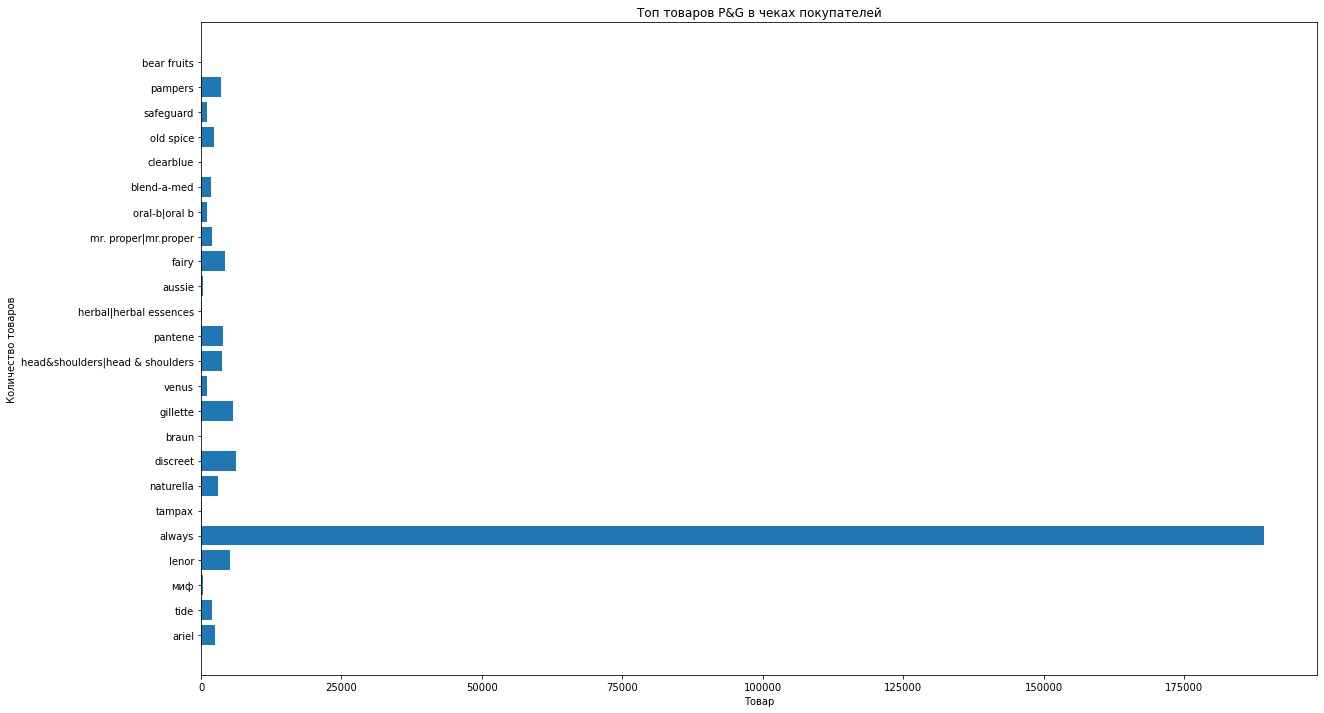

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,12))
plt.barh(res.index, res)
plt.title('Топ товаров P&G в чеках покупателей')
plt.ylabel('Количество товаров')
plt.xlabel('Товар');

##### Использованные материалы:
  

* [Качество данных | Бизнес-Анализ в России](https://analytics.infozone.pro/kachestvo-dannyh/)  
* [Документация библиотеки Efficient-Apriori](https://efficient-apriori.readthedocs.io/en/latest/index.html)  
* [Association Rule Mining via Apriori Algorithm in Python - Stack Abuse](https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python)  
* [Бренды | Procter and Gamble](https://www.procterandgamble.ru/brendy-i-produktsiya/)